# Methods signal fig

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [2]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Processed"

#casein session
animal="VGP505"
day="037"
day_meta='037'
date="20230418"


s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='reduced_metafile')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[2] == day_meta: 
        events_file=folder+row[5]

        


data = assemble_data(s2p_folder,events_file,animal="VGP505", diet="PR", solution="Casein")

File is excel file. Making csv metafile first


In [3]:
s2p_length=len(data['raw_F'][0,:])
pump_frames,lick_frames=get_frames(events_file,s2p_length)


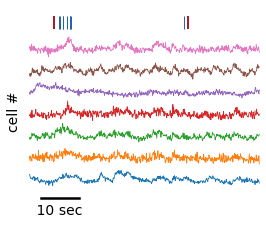

In [4]:
def z_score(signal):
    mean=np.mean(signal)
    sd=np.std(signal)
    z=(signal-mean)/sd
    
    return z

start_frame=2250
n_frames=600
frames_to_plot=range(start_frame,start_frame+n_frames)
cell_to_plot7=61
cell_to_plot2=17
cell_to_plot4=31
cell_to_plot3=57
cell_to_plot5=78
cell_to_plot6=81
cell_to_plot1=87


licks_to_plot=[lick-start_frame for lick in lick_frames]
pumps_to_plot=[pump-start_frame for pump in pump_frames]
signal_to_plot1 = z_score(data['raw_F'][cell_to_plot1,frames_to_plot])
signal_to_plot2 = z_score(data['raw_F'][cell_to_plot2,frames_to_plot])
signal_to_plot3 = z_score(data['raw_F'][cell_to_plot3,frames_to_plot])
signal_to_plot7 = z_score(data['raw_F'][cell_to_plot4,frames_to_plot])
signal_to_plot5 = z_score(data['raw_F'][cell_to_plot5,frames_to_plot])
signal_to_plot6 = z_score(data['raw_F'][cell_to_plot6,frames_to_plot])
signal_to_plot4 = z_score(data['raw_F'][cell_to_plot7,frames_to_plot])

signals_to_plot= [signal_to_plot1, signal_to_plot2, signal_to_plot3, signal_to_plot4, signal_to_plot5, signal_to_plot6, signal_to_plot7]




f,ax=plt.subplots(figsize=(4,3), ncols=1, nrows=1, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.1, top=0.98)

for i, arr in enumerate(signals_to_plot):
    offset = i * 8  # Adjust the offset as needed
    y_values = arr + offset
    ax.plot(y_values, label=f'Array {i + 1}',lw=0.8)
    


ax.vlines(licks_to_plot,60,55,lw=1, color='#2166ac')
ax.vlines(pumps_to_plot,60,55, lw=2, color='#b2182b')
ax.set_xlim(0,n_frames)

#time scale bar
scale_bar_y=-7
scale_bar_x=30

ax.plot([scale_bar_x,scale_bar_x+100],[scale_bar_y,scale_bar_y],color='k', lw=2.5)
ax.text(scale_bar_x+42,scale_bar_y-2,' 10 sec',ha='center',va='top', size=14)

# z scale bar
scale_bar_y=0
scale_bar_x=-20
# ax.plot([scale_bar_x,scale_bar_x],[scale_bar_y,scale_bar_y+2],color='k',clip_on=False)

ax.text(scale_bar_x-1,scale_bar_y+25,'cell #',ha='right',va='center', size=14 ,rotation='vertical')

# ax.text(0,60,' licks',ha='right',va='center', size=13)
# ax.text(0,6.6,' pumps',ha='right',va='center', size=13)
tp.invisible_axes(ax)
# ax[.set_ylabel('# of licks \n per sesseion',fontsize = 13)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\representative_singal_licks.pdf')